In [55]:
import pandas as pd
import numpy as np
from pycaret.regression import *
import requests as req
from datetime import datetime

In [56]:
data = req.get("https://api.thingspeak.com/channels/2167188/feeds.json")
data_json = data.json()["feeds"]

In [57]:
df = pd.DataFrame(data_json)
df

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-05-13T09:10:00Z,1,25.60,41.00,14.00,22.50,27.90,97848,366,415
1,2023-05-13T09:11:00Z,2,25.60,40.90,14.50,22.50,27.90,97846,309,377
2,2023-05-13T09:12:01Z,3,25.60,40.90,14.50,22.50,27.80,97850,428,449
3,2023-05-13T09:13:06Z,4,25.60,40.90,14.25,22.50,27.30,97847,68,36
4,2023-05-13T09:14:06Z,5,25.60,41.50,14.75,22.50,27.10,97850,163,121
...,...,...,...,...,...,...,...,...,...,...
95,2023-05-13T10:45:01Z,96,24.40,47.70,16.75,23.25,24.60,97848,414,546
96,2023-05-13T10:46:02Z,97,24.40,47.50,17.25,23.25,25.60,97845,500,629
97,2023-05-13T10:47:02Z,98,24.40,47.60,18.25,23.00,24.90,97850,486,616
98,2023-05-13T10:48:03Z,99,24.40,47.30,18.25,23.00,24.50,97844,443,585


In [58]:
df.drop("entry_id", axis = 1, inplace = True)

In [59]:
df

,created_at,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-05-13T09:10:00Z,25.60,41.00,14.00,22.50,27.90,97848,366,415
1,2023-05-13T09:11:00Z,25.60,40.90,14.50,22.50,27.90,97846,309,377
2,2023-05-13T09:12:01Z,25.60,40.90,14.50,22.50,27.80,97850,428,449
3,2023-05-13T09:13:06Z,25.60,40.90,14.25,22.50,27.30,97847,68,36
4,2023-05-13T09:14:06Z,25.60,41.50,14.75,22.50,27.10,97850,163,121
...,...,...,...,...,...,...,...,...,...
95,2023-05-13T10:45:01Z,24.40,47.70,16.75,23.25,24.60,97848,414,546
96,2023-05-13T10:46:02Z,24.40,47.50,17.25,23.25,25.60,97845,500,629
97,2023-05-13T10:47:02Z,24.40,47.60,18.25,23.00,24.90,97850,486,616
98,2023-05-13T10:48:03Z,24.40,47.30,18.25,23.00,24.50,97844,443,585


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  100 non-null    object
 1   field1      100 non-null    object
 2   field2      100 non-null    object
 3   field3      100 non-null    object
 4   field4      100 non-null    object
 5   field5      100 non-null    object
 6   field6      100 non-null    object
 7   field7      100 non-null    object
 8   field8      100 non-null    object
dtypes: object(9)
memory usage: 7.2+ KB


In [61]:
df["created_at"] = df["created_at"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d"))

In [62]:
df["created_at"][0].split("-")

['2023', '05', '13']

In [63]:
df["date"] = np.nan * len(df)
df["time"] = np.nan * len(df)
df["local"] = np.nan * len(df)


In [64]:
for idx, value in enumerate(df.created_at):
    df["date"][idx] = df["created_at"][idx].split("-")[0]

for idx, value in enumerate(df.created_at):
    df["time"][idx] = df["created_at"][idx].split("-")[1]

for idx, value in enumerate(df.created_at):
    df["local"][idx] = df["created_at"][idx].split("-")[-1]

In [65]:
df

,created_at,field1,field2,field3,field4,field5,field6,field7,field8,date,time,local
0,2023-05-13,25.60,41.00,14.00,22.50,27.90,97848,366,415,2023,05,13
1,2023-05-13,25.60,40.90,14.50,22.50,27.90,97846,309,377,2023,05,13
2,2023-05-13,25.60,40.90,14.50,22.50,27.80,97850,428,449,2023,05,13
3,2023-05-13,25.60,40.90,14.25,22.50,27.30,97847,68,36,2023,05,13
4,2023-05-13,25.60,41.50,14.75,22.50,27.10,97850,163,121,2023,05,13
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2023-05-13,24.40,47.70,16.75,23.25,24.60,97848,414,546,2023,05,13
96,2023-05-13,24.40,47.50,17.25,23.25,25.60,97845,500,629,2023,05,13
97,2023-05-13,24.40,47.60,18.25,23.00,24.90,97850,486,616,2023,05,13
98,2023-05-13,24.40,47.30,18.25,23.00,24.50,97844,443,585,2023,05,13


In [66]:
df.drop("created_at", axis = 1, inplace = True)

In [67]:
df

,field1,field2,field3,field4,field5,field6,field7,field8,date,time,local
0,25.60,41.00,14.00,22.50,27.90,97848,366,415,2023,05,13
1,25.60,40.90,14.50,22.50,27.90,97846,309,377,2023,05,13
2,25.60,40.90,14.50,22.50,27.80,97850,428,449,2023,05,13
3,25.60,40.90,14.25,22.50,27.30,97847,68,36,2023,05,13
4,25.60,41.50,14.75,22.50,27.10,97850,163,121,2023,05,13
...,...,...,...,...,...,...,...,...,...,...,...
95,24.40,47.70,16.75,23.25,24.60,97848,414,546,2023,05,13
96,24.40,47.50,17.25,23.25,25.60,97845,500,629,2023,05,13
97,24.40,47.60,18.25,23.00,24.90,97850,486,616,2023,05,13
98,24.40,47.30,18.25,23.00,24.50,97844,443,585,2023,05,13


In [68]:
df = df.reindex(["date", "time", "local", "field2", "field3", "field4", "field5", "field6", "field7", "field8", "field1"], axis = 1)

In [69]:
df

,date,time,local,field2,field3,field4,field5,field6,field7,field8,field1
0,2023,05,13,41.00,14.00,22.50,27.90,97848,366,415,25.60
1,2023,05,13,40.90,14.50,22.50,27.90,97846,309,377,25.60
2,2023,05,13,40.90,14.50,22.50,27.80,97850,428,449,25.60
3,2023,05,13,40.90,14.25,22.50,27.30,97847,68,36,25.60
4,2023,05,13,41.50,14.75,22.50,27.10,97850,163,121,25.60
...,...,...,...,...,...,...,...,...,...,...,...
95,2023,05,13,47.70,16.75,23.25,24.60,97848,414,546,24.40
96,2023,05,13,47.50,17.25,23.25,25.60,97845,500,629,24.40
97,2023,05,13,47.60,18.25,23.00,24.90,97850,486,616,24.40
98,2023,05,13,47.30,18.25,23.00,24.50,97844,443,585,24.40


In [70]:
df = df.rename(columns = {"field6": "target"})

In [71]:
df

,date,time,local,field2,field3,field4,field5,target,field7,field8,field1
0,2023,05,13,41.00,14.00,22.50,27.90,97848,366,415,25.60
1,2023,05,13,40.90,14.50,22.50,27.90,97846,309,377,25.60
2,2023,05,13,40.90,14.50,22.50,27.80,97850,428,449,25.60
3,2023,05,13,40.90,14.25,22.50,27.30,97847,68,36,25.60
4,2023,05,13,41.50,14.75,22.50,27.10,97850,163,121,25.60
...,...,...,...,...,...,...,...,...,...,...,...
95,2023,05,13,47.70,16.75,23.25,24.60,97848,414,546,24.40
96,2023,05,13,47.50,17.25,23.25,25.60,97845,500,629,24.40
97,2023,05,13,47.60,18.25,23.00,24.90,97850,486,616,24.40
98,2023,05,13,47.30,18.25,23.00,24.50,97844,443,585,24.40


In [72]:
df.local.value_counts()

13    100
Name: local, dtype: int64

In [73]:
df.local = df.local.apply(lambda x: 0 if x == "UTC" else 1)

In [74]:
df

,date,time,local,field2,field3,field4,field5,target,field7,field8,field1
0,2023,05,1,41.00,14.00,22.50,27.90,97848,366,415,25.60
1,2023,05,1,40.90,14.50,22.50,27.90,97846,309,377,25.60
2,2023,05,1,40.90,14.50,22.50,27.80,97850,428,449,25.60
3,2023,05,1,40.90,14.25,22.50,27.30,97847,68,36,25.60
4,2023,05,1,41.50,14.75,22.50,27.10,97850,163,121,25.60
...,...,...,...,...,...,...,...,...,...,...,...
95,2023,05,1,47.70,16.75,23.25,24.60,97848,414,546,24.40
96,2023,05,1,47.50,17.25,23.25,25.60,97845,500,629,24.40
97,2023,05,1,47.60,18.25,23.00,24.90,97850,486,616,24.40
98,2023,05,1,47.30,18.25,23.00,24.50,97844,443,585,24.40


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    100 non-null    object
 1   time    100 non-null    object
 2   local   100 non-null    int64 
 3   field2  100 non-null    object
 4   field3  100 non-null    object
 5   field4  100 non-null    object
 6   field5  100 non-null    object
 7   target  100 non-null    object
 8   field7  100 non-null    object
 9   field8  100 non-null    object
 10  field1  100 non-null    object
dtypes: int64(1), object(10)
memory usage: 8.7+ KB


In [76]:
for col in df.columns:
    df[col] = df[col].astype(float)

In [77]:
df

,date,time,local,field2,field3,field4,field5,target,field7,field8,field1
0,2023.0,5.0,1.0,41.0,14.00,22.50,27.9,97848.0,366.0,415.0,25.6
1,2023.0,5.0,1.0,40.9,14.50,22.50,27.9,97846.0,309.0,377.0,25.6
2,2023.0,5.0,1.0,40.9,14.50,22.50,27.8,97850.0,428.0,449.0,25.6
3,2023.0,5.0,1.0,40.9,14.25,22.50,27.3,97847.0,68.0,36.0,25.6
4,2023.0,5.0,1.0,41.5,14.75,22.50,27.1,97850.0,163.0,121.0,25.6
...,...,...,...,...,...,...,...,...,...,...,...
95,2023.0,5.0,1.0,47.7,16.75,23.25,24.6,97848.0,414.0,546.0,24.4
96,2023.0,5.0,1.0,47.5,17.25,23.25,25.6,97845.0,500.0,629.0,24.4
97,2023.0,5.0,1.0,47.6,18.25,23.00,24.9,97850.0,486.0,616.0,24.4
98,2023.0,5.0,1.0,47.3,18.25,23.00,24.5,97844.0,443.0,585.0,24.4


In [78]:
df.to_csv("data/data.csv", index = False)

In [79]:
s = setup(df, target = 'target', session_id = 1)

In [80]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:03:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [81]:
print(best_model)

RandomForestRegressor(n_jobs=-1, random_state=1)


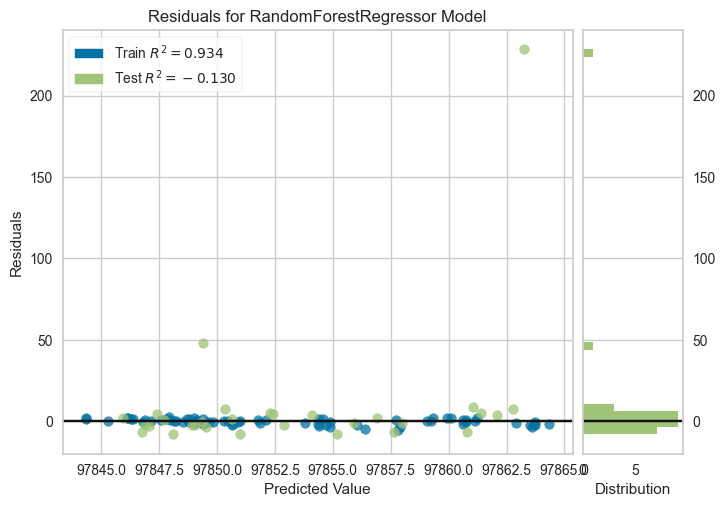

In [82]:
plot_model(best_model)

In [83]:
predictions = predict_model(best_model, data = df)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,4.8856,553.3153,23.5227,-0.0294,0.0002,0.0000


,date,time,local,field2,field3,field4,field5,field7,field8,field1,target,prediction_label
0,2023.0,5.0,1.0,41.000000,14.00,22.5,27.900000,366.0,415.0,25.6,97848.0,97849.14
1,2023.0,5.0,1.0,40.900002,14.50,22.5,27.900000,309.0,377.0,25.6,97846.0,97847.79
2,2023.0,5.0,1.0,40.900002,14.50,22.5,27.799999,428.0,449.0,25.6,97850.0,97854.11
3,2023.0,5.0,1.0,40.900002,14.25,22.5,27.299999,68.0,36.0,25.6,97847.0,97847.97
4,2023.0,5.0,1.0,41.500000,14.75,22.5,27.100000,163.0,121.0,25.6,97850.0,97849.50


In [84]:
tuned_model = tune_model(best_model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:04:18
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9499,5.3349,2.3097,0.2356,0.0000,0.0000
1,3.4027,21.0829,4.5916,0.5600,0.0000,0.0000
2,5.2626,37.3678,6.1129,0.0715,0.0001,0.0001
3,2.9372,11.3066,3.3625,0.7777,0.0000,0.0000
4,3.6435,16.7878,4.0973,0.0041,0.0000,0.0000
5,3.1801,13.9173,3.7306,0.4639,0.0000,0.0000
6,2.7631,13.4128,3.6624,0.3981,0.0000,0.0000
7,5.0273,32.6714,5.7159,0.4642,0.0001,0.0001
8,4.0966,22.0958,4.7006,0.5676,0.0000,0.0000


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9499,5.3349,2.3097,0.2356,0.0000,0.0000
1,3.4027,21.0829,4.5916,0.5600,0.0000,0.0000
2,5.2626,37.3678,6.1129,0.0715,0.0001,0.0001
3,2.9372,11.3066,3.3625,0.7777,0.0000,0.0000
4,3.6435,16.7878,4.0973,0.0041,0.0000,0.0000
5,3.1801,13.9173,3.7306,0.4639,0.0000,0.0000
6,2.7631,13.4128,3.6624,0.3981,0.0000,0.0000
7,5.0273,32.6714,5.7159,0.4642,0.0001,0.0001
8,4.0966,22.0958,4.7006,0.5676,0.0000,0.0000


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [85]:
save_model(tuned_model, "model_pickle")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Henrico\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['date', 'time', 'local', 'field2',
                                              'field3', 'field4', 'field5',
                                              'field7', 'field8', 'field1'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  RandomForestRegressor(bootstrap=False, max_depth=10,
                                        max_features='log2',
                                        min_impurity_decrease=0.0001,
                                        min_samples_leaf=5, min_samples_split=7,
                                        n_estimators=70, n_jobs=-1,
         